In [1]:
from wordle_modeller import wordle_solver, formatgametohtml

import seaborn as sns
import matplotlib.pyplot as plt # for data visualization

import pandas as pd
import numpy as np

from IPython.display import display, HTML

sns.set_theme(style="darkgrid")
sns.color_palette()
sns.despine()

<Figure size 640x480 with 0 Axes>

In [2]:
from matplotlib import style

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
#There are multiple choices available for dictionaries
g = wordle_solver(dict_file = 'wordle_words.txt')
#g = wordle_solver(dict_file = 'parole_words.txt')
#g = wordle_solver(dict_file = 'full_five_letters_words.txt')

Loaded dictionary with 2315 words


### Let's start with some basic frequency analysis on the wordlist

In [4]:
frequency, positions = g.analyse_frequency(ascount=False)
df1 = pd.DataFrame.from_dict(frequency, orient='index', columns=['frequency'])
df1.index.name = 'letter'
df1.sort_values(by=['frequency'], ascending=False)

,frequency
letter,
E,0.111784
A,0.088858
R,0.081981
O,0.068226
T,0.065750
L,0.064924
S,0.058964
N,0.052270
I,0.051077


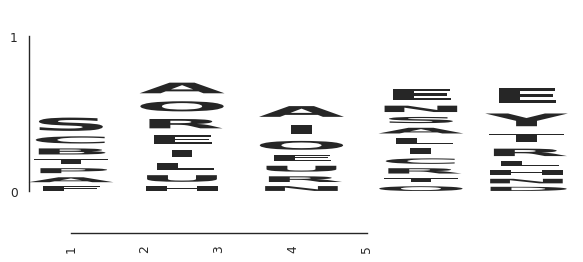

In [5]:
# Plot a sequence logo of the most frequent letters by position
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import transforms
import matplotlib.patheffects
import numpy as np

# Use a current seaborn style
sns.set_theme(style="white", context="paper")

class Scale(matplotlib.patheffects.RendererBase):
    def __init__(self, sx, sy=None):
        self._sx = sx
        self._sy = sy
        
    def draw_path(self, renderer, gc, tpath, affine, rgbFace):
        # Create a new identity transform and then scale it
        new_affine = transforms.Affine2D().scale(self._sx, self._sy) + affine
        renderer.draw_path(gc, tpath, new_affine, rgbFace)

# Assuming positions is defined elsewhere in your code
# If not, you'll need to define it before running this code

fig = plt.figure()
fig.set_size_inches(len(positions), 2.5)
ax = fig.add_subplot(111)
ax.set_xticks(range(len(positions)))

xshift = 0
trans_offset = transforms.offset_copy(ax.transAxes, 
                                      fig=fig, 
                                      x=0, 
                                      y=0, 
                                      units='points')

for pos in positions:
    yshift = 0
    for letter in pos:
        freq = pos[letter]
        if freq > 0.05:
            txt = ax.text(0, 
                          0, 
                          letter, 
                          transform=trans_offset,
                          fontsize=80, 
                          # color=COLOR_SCHEME[base],  # Uncomment if COLOR_SCHEME is defined
                          weight='bold',
                          ha='center',
                          family='sans-serif'
                         )
            txt.set_clip_on(False) 
            txt.set_path_effects([Scale(1.0, freq)])
            
            # Need to draw before getting window extent
            fig.canvas.draw()
            
            # Get renderer in current matplotlib API
            renderer = fig.canvas.get_renderer()
            window_ext = txt.get_window_extent(renderer)
            
            yshift = window_ext.height * freq
            trans_offset = transforms.offset_copy(txt.get_transform(), 
                                                 fig=fig, 
                                                 y=yshift, 
                                                 units='points')
    
    xshift += window_ext.width
    trans_offset = transforms.offset_copy(ax.transAxes, 
                                         fig=fig, 
                                         x=xshift, 
                                         units='points')

ax.set_yticks(range(0, 2))

# Use current Seaborn despine method
sns.despine(ax=ax, offset=30, trim=True)

ax.set_xticklabels(range(1, len(positions) + 1), rotation=90)
ax.set_yticklabels(np.arange(0, 2, 1))

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Frequency of letters in the wordle database'}, xlabel='letter'>

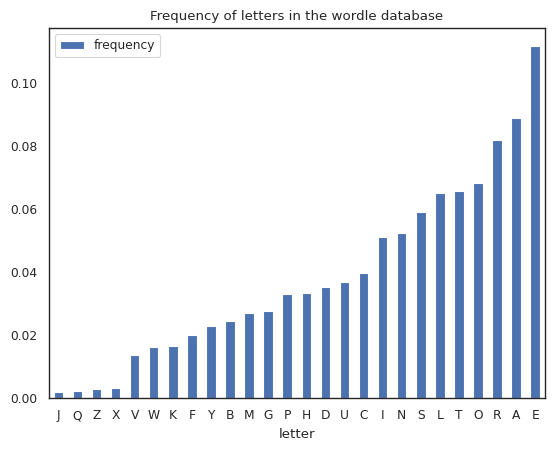

In [6]:
df1.plot(kind="bar", rot=0, title='Frequency of letters in the wordle database')#, color='#a51d2dff')

In [7]:
g.frequency_rank(limit=50)

['EERIE',
 'EATER',
 'ERASE',
 'RARER',
 'ELATE',
 'TEASE',
 'EASEL',
 'LEASE',
 'TEPEE',
 'EATEN',
 'TERRA',
 'RESET',
 'ESTER',
 'TERSE',
 'STEER',
 'MELEE',
 'ERROR',
 'ARENA',
 'ENTER',
 'AGREE',
 'EAGER',
 'GEESE',
 'SNEER',
 'TREAT',
 'LATER',
 'ALTER',
 'ALERT',
 'SLEET',
 'STEEL',
 'CEASE',
 'ERECT',
 'AROSE',
 'RETRO',
 'ERODE',
 'FREER',
 'REFER',
 'TENET',
 'STARE',
 'DETER',
 'ELDER',
 'ELITE',
 'EAGLE',
 'THERE',
 'ETHER',
 'THREE',
 'RACER',
 'SCREE',
 'LEPER',
 'REPEL',
 'EMCEE']

In [8]:
for word in ['snare', 'sleep', 'slept', 'tomas']:
    print ( g.check_rank(word) )

{'SNARE': 65, 'total': 2315}
{'SLEEP': 124, 'total': 2315}
{'SLEPT': 539, 'total': 2315}
{'TOMAS': 'not found', 'total': 2315}


### To visualize a single game:

In [9]:
r = g.solve(use_smart=True, exclude=1)
#the graphical visualization requires CSS and will not work on github
display(HTML(formatgametohtml(r['game'])))
r['game']

[('RAISE', '____e'),
 ('COUNT', '_o_n_'),
 ('DEMON', '_EmON'),
 ('MELON', 'MELON')]

### To solve a game follow this protocol

In [10]:
#start word can be totally random
word, _ = g.pick_random_word()
word

'AWASH'

In [11]:
#or get one from the smart set if you prefer
g.pick_smart_word()

'SNARE'

In [12]:
#enter the word in the game and fill the requirements for the next word based on the result
word, possibilities_left = g.pick_random_word(has_letters="", hasnot_letters="", pattern="")

#the system returns a list of all the words that match those criteria
print (possibilities_left)

#and from that list picks a random word for you
print (word)

['EERIE', 'EATER', 'ERASE', 'RARER', 'ELATE', 'TEASE', 'EASEL', 'LEASE', 'TEPEE', 'EATEN', 'TERRA', 'RESET', 'ESTER', 'TERSE', 'STEER', 'MELEE', 'ERROR', 'ARENA', 'ENTER', 'AGREE', 'EAGER', 'GEESE', 'SNEER', 'TREAT', 'LATER', 'ALTER', 'ALERT', 'SLEET', 'STEEL', 'CEASE', 'ERECT', 'AROSE', 'RETRO', 'ERODE', 'FREER', 'REFER', 'TENET', 'STARE', 'DETER', 'ELDER', 'ELITE', 'EAGLE', 'THERE', 'ETHER', 'THREE', 'RACER', 'SCREE', 'LEPER', 'REPEL', 'EMCEE']
ALOFT


In [13]:
g.frequency_rank(possibilities_left, limit=10)

['EERIE',
 'TEPEE',
 'GEESE',
 'FREER',
 'REFER',
 'MELEE',
 'EMCEE',
 'EATER',
 'RESET',
 'ESTER']

### Let's start solving to compare strategies

In [14]:
#stupid mode - just random words with no rationale
r0 = g.solve_many(use_smart=False, stupid_mode=True, N_GAMES=10000, exclude=0)
r0['success_rate']

0.0019

In [28]:
#do you want to try performance on today's word? If yes, put it here. Otherwise for general performance set to None
guess_word = "eager"

#do you want to try performance with a given starting word?
start_with = ''

In [29]:
r1 = g.solve_many(guess_word=guess_word, start_with=start_with, use_smart=False, N_GAMES=1000, exclude=0)

In [30]:
r2 = g.solve_many(guess_word=guess_word, start_with=start_with, use_smart=True, N_GAMES=1000, exclude=0)

In [31]:
r3 = g.solve_many(guess_word=guess_word, start_with=start_with, use_smart=True, N_GAMES=1000, exclude=1)

In [32]:
r4 = g.solve_many(guess_word=guess_word, start_with=start_with, use_smart=True, N_GAMES=1000, exclude=2)

In [33]:
df1 = pd.DataFrame(data=r1['profile'])
df1.index.name = 'game'
df1.columns = ['success']
df1['use_smart'] = False
df1['exclude'] = 0
df1['strategy'] = 'No smart start, no exclusion'

In [34]:
df2 = pd.DataFrame(data=r2['profile'])
df2.index.name = 'game'
df2.columns = ['success']
df2['use_smart'] = True
df2['exclude'] = 0
df2['strategy'] = 'Smart start, no exclusion'

In [35]:
df3 = pd.DataFrame(data=r3['profile'])
df3.index.name = 'game'
df3.columns = ['success']
df3['use_smart'] = True
df3['exclude'] = 1
df3['strategy'] = 'Smart start, 1 exclusion'

In [36]:
df4 = pd.DataFrame(data=r4['profile'])
df4.index.name = 'game'
df4.columns = ['success']
df4['use_smart'] = True
df4['exclude'] = 2
df4['strategy'] = 'Smart start, 2 exclusions'

In [37]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df

,success,use_smart,exclude,strategy
0,7,False,0,"No smart start, no exclusion"
1,3,False,0,"No smart start, no exclusion"
2,7,False,0,"No smart start, no exclusion"
3,3,False,0,"No smart start, no exclusion"
4,3,False,0,"No smart start, no exclusion"
...,...,...,...,...
3995,4,True,2,"Smart start, 2 exclusions"
3996,4,True,2,"Smart start, 2 exclusions"
3997,7,True,2,"Smart start, 2 exclusions"
3998,4,True,2,"Smart start, 2 exclusions"


/tmp/ipykernel_280538/616815563.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p.set_xticklabels([ 1, 2, 3, 4, 5, 6, 'Not found'])


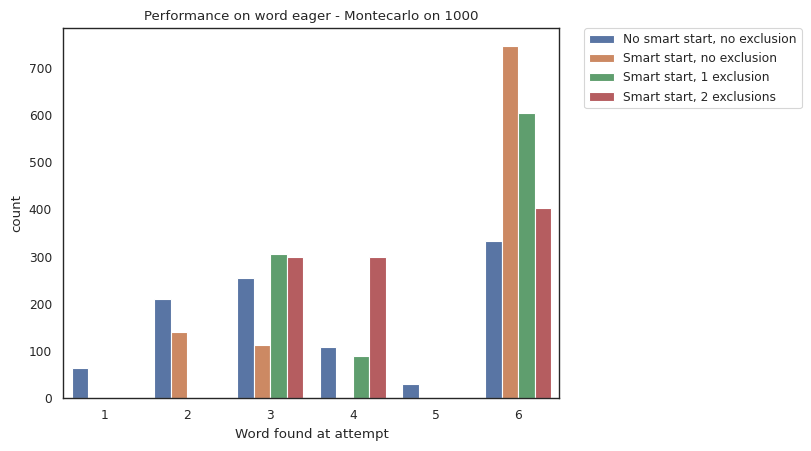

In [40]:
p = sns.countplot(data=df, x='success', hue='strategy')
p.set_xticklabels([ 1, 2, 3, 4, 5, 6, 'Not found'])
p.set_xlabel("Word found at attempt")

p.set_title(f"Performance on word {guess_word} - Montecarlo on 1000")

# Place the legend out of the figure
p.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [41]:
print ('success rate: ', r1['success_rate'], r2['success_rate'], r3['success_rate'], r4['success_rate'])
print ('average success attempt: ', np.mean( r1['profile']), np.mean( r2['profile']),np.mean( r2['profile']), np.mean( r3['profile']))

success rate:  0.666 0.253 0.396 0.597
average success attempt:  4.831 6.101 6.101 5.902


In [27]:
#success rate:  0.961 0.971 0.97 0.98
#average success attempt:  4.3 4.188 4.188 4.178